In [ ]:
!pip install scipy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import kagglehub
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

In [ ]:
path = kagglehub.dataset_download("kartik2112/fraud-detection")
df = pd.read_csv(path+'/fraudTrain.csv')

100%|██████████| 202M/202M [00:03<00:00, 64.7MB/s]

Extracting files...


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
from datetime import datetime
for i in (1,2,3, 7,8,9,10,15,21):
  df[df.columns[i]] = df[df.columns[i]].astype('category')

for i in (5,6,17):
  df[df.columns[i]] = df[df.columns[i]].astype('string')



df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],errors="coerce")
df['dob'] = pd.to_datetime(df['dob'])

In [ ]:
df1=df.copy()

Data Anonymization and Feature Removal

In [ ]:
df1 = df1.drop(["cc_num","first","last","trans_num"], axis = 1)
df1.head()

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [ ]:
!pip install haversine
import haversine

In [ ]:
from haversine import haversine_vector, Unit
df1["distance"]=0
for i in range (len(df1)):
  df1["distance"][i]=haversine_vector((df1["lat"][i], df1["long"][i]), (df1["merch_lat"][i],df1["merch_long"][i]), unit=Unit.KILOMETERS)
df1["distance"]=np.round(df1["distance"],3)
df1.head()

<ipython-input-10-cd0c0bfaecf3>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["distance"][i]=haversine_vector((df1["lat"][i], df1["long"][i]), (df1["merch_lat"][i],df1["merch_long"][i]), unit=Unit.KILOMETERS)
<ipython-input-10-cd0c0bf

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,distance
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,78.598
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,30.212
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,108.206
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,95.673
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,77.557


In [ ]:
df1=df1.drop(["lat","long","merch_lat","merch_long"],axis=1)

In [ ]:
df1["distance"].describe()

,distance
count,1.296675e+06
mean,7.611476e+01
std,2.911698e+01
min,2.200000e-02
25%,5.533500e+01
50%,7.823200e+01
75%,9.850300e+01
max,1.521170e+02


In [ ]:
print("trans_date_trans_time:",df1["trans_date_trans_time"][0], "unix_time:",df1["unix_time"][0])
print("trans_date_trans_time:",df1["trans_date_trans_time"][81], "unix_time:",df1["unix_time"][81])
print("Difference between 2 units in trans_date_trans_time:", df1["trans_date_trans_time"][81] - df1["trans_date_trans_time"][0])
print("Difference between 2 units unix time:", df1["unix_time"][81] - df1["unix_time"][0])

trans_date_trans_time: 2019-01-01 00:00:18 unix_time: 1325376018
trans_date_trans_time: 2019-01-01 01:00:19 unix_time: 1325379619
Difference between 2 units in trans_date_trans_time: 0 days 01:00:01
Difference between 2 units unix time: 3601


In [ ]:
df1=df1.drop(["unix_time"],axis=1)

In [ ]:
df1['age'] = (df1['trans_date_trans_time'] - df1['dob']).dt.days // 365
df1['age'] = df1['age'].astype('int')

In [ ]:
df1=df1.drop(["dob"],axis=1)

In [ ]:
df1=df1.drop(["zip","street"],axis=1)

In [ ]:
df2=df1.copy()

<ipython-input-19-bbbf16f9cd79>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = (df2.groupby(["is_fraud"]).size() / len(df2) * 100).plot(kind='bar', figsize=(8, 5))


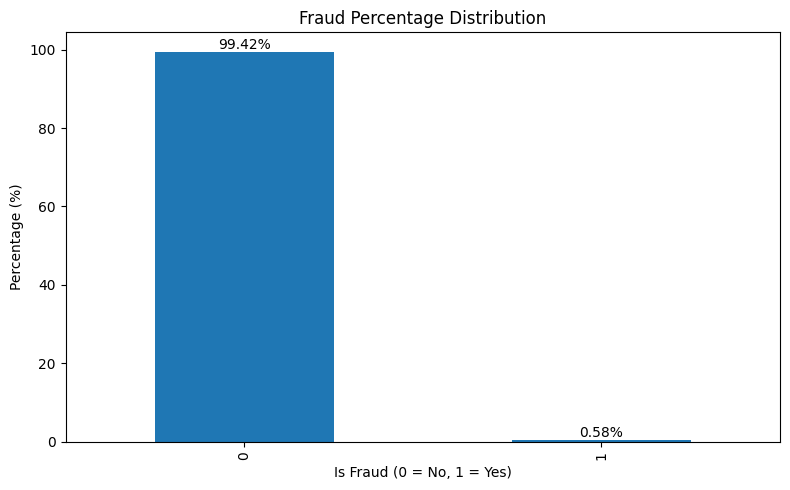

In [ ]:
ax = (df2.groupby(["is_fraud"]).size() / len(df2) * 100).plot(kind='bar', figsize=(8, 5))
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.2f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.title('Fraud Percentage Distribution')
plt.xlabel('Is Fraud (0 = No, 1 = Yes)')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()

In [ ]:
df2.dtypes

,0
trans_date_trans_time,datetime64[ns]
merchant,category
category,category
amt,float64
gender,category
city,category
state,category
city_pop,int64
job,category
is_fraud,category


<ipython-input-21-6a2d858e5d0d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df2.groupby('d').size()).reindex(


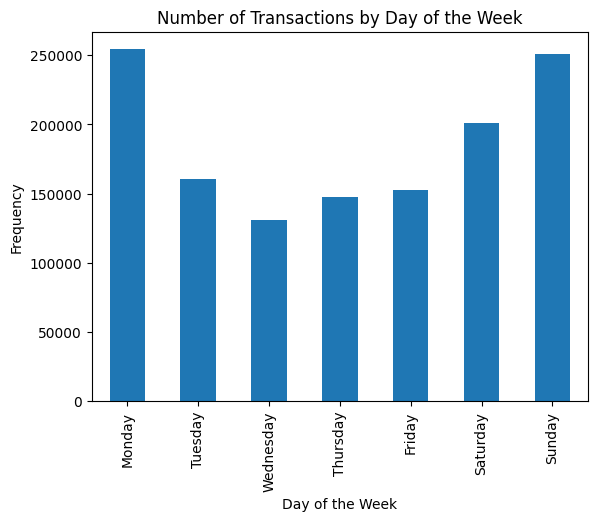

In [ ]:
df2['d'] = df2['trans_date_trans_time'].dt.day_name()
df2["d"] = df2["d"].astype("category")
(df2.groupby('d').size()).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar')

plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

<ipython-input-22-84b2e79bb824>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ((df2[df2["is_fraud"] == 1].groupby(df2['d']).size() * 100) /(df2.groupby(df2['d']).size())).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind="bar", color="r")
<ipython-input-22-84b2e79bb824>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ((df2[df2["is_fraud"] == 1].groupby(df2['d']).size() * 100) /(df2.groupby(df2['d']).size())).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind="bar", color="r")


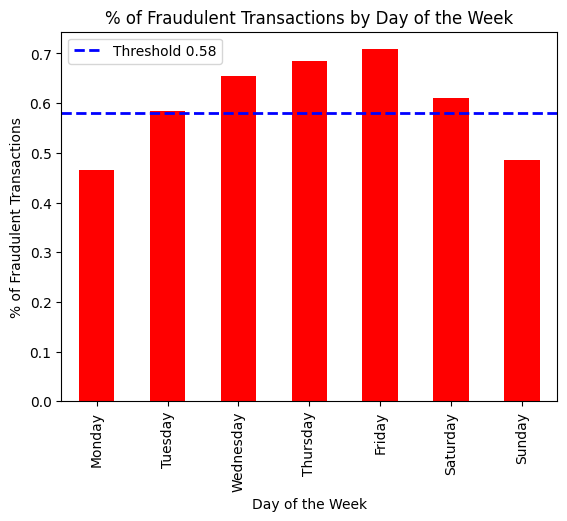

In [ ]:
((df2[df2["is_fraud"] == 1].groupby(df2['d']).size() * 100) /(df2.groupby(df2['d']).size())).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind="bar", color="r")
plt.axhline(y=0.58, color="b", linestyle="--", linewidth=2, label="Threshold 0.58")
plt.title('% of Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('% of Fraudulent Transactions')
plt.legend()
plt.show()

<ipython-input-23-a0c4a3f98274>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df2.groupby('ym').size()).plot(kind ='bar')


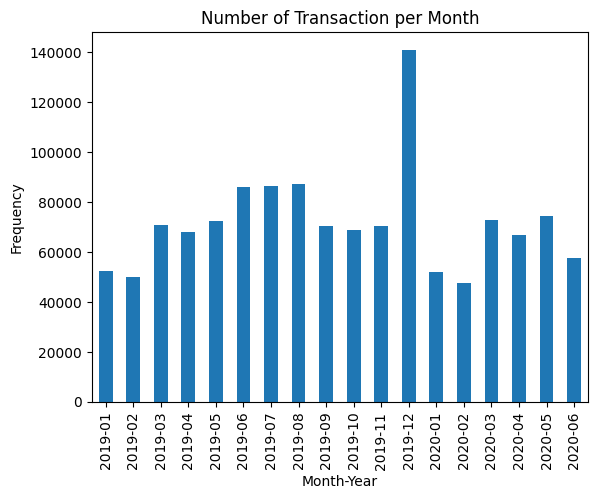

In [ ]:
df2['ym'] = df2['trans_date_trans_time'].dt.strftime('%Y-%m')
df2["ym"] = df2["ym"].astype("category")
(df2.groupby('ym').size()).plot(kind ='bar')
plt.title('Number of Transaction per Month')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.show()

<ipython-input-24-6f116f631ac2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2[df2["is_fraud"]==1].groupby("ym").size().plot(kind='bar',color="r")


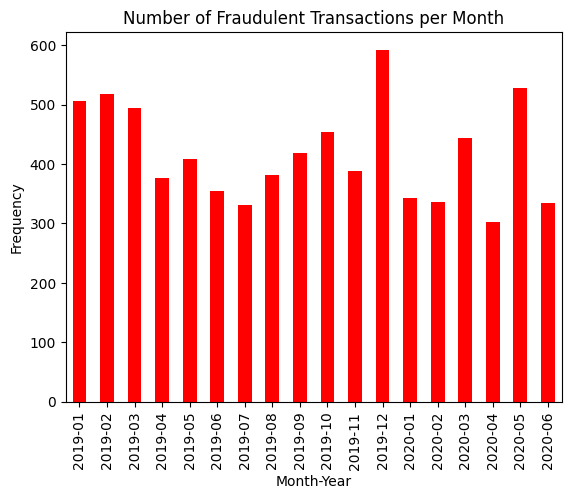

In [ ]:
df2[df2["is_fraud"]==1].groupby("ym").size().plot(kind='bar',color="r")
plt.title('Number of Fraudulent Transactions per Month')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.show()

<ipython-input-25-8d042b677140>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round((df2[df2['is_fraud'] == 1].groupby('ym').size()*100)/df2['is_fraud'].groupby(df2["ym"]).size(),2).plot(kind="bar",color="r")
<ipython-input-25-8d042b677140>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round((df2[df2['is_fraud'] == 1].groupby('ym').size()*100)/df2['is_fraud'].groupby(df2["ym"]).size(),2).plot(kind="bar",color="r")


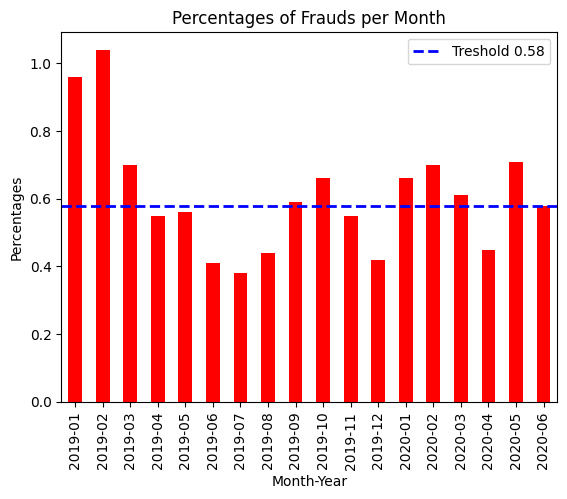

In [ ]:
round((df2[df2['is_fraud'] == 1].groupby('ym').size()*100)/df2['is_fraud'].groupby(df2["ym"]).size(),2).plot(kind="bar",color="r")
plt.axhline(y=0.58,color="b",linestyle="--",linewidth=2,label="Treshold 0.58")
plt.title('Percentages of Frauds per Month')
plt.xlabel('Month-Year')
plt.ylabel('Percentages')
plt.legend()
plt.show()

<ipython-input-26-cbe08661a189>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df2.groupby("hour").size()).plot(kind="bar",color="g")


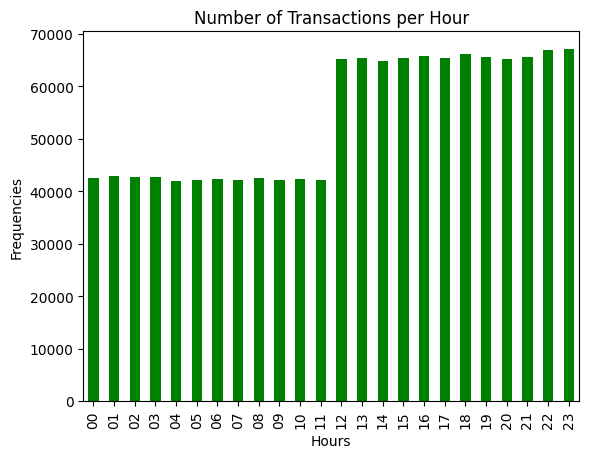

In [ ]:
df2['hour'] = df2['trans_date_trans_time'].dt.strftime('%H')
df2["hour"] = df2["hour"].astype("category")
(df2.groupby("hour").size()).plot(kind="bar",color="g")
plt.title('Number of Transactions per Hour')
plt.xlabel('Hours')
plt.ylabel('Frequencies')
plt.show()

<ipython-input-27-4208474eb8ca>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ((df2[df2['is_fraud'] == 1].groupby('hour').size()*100)/df2.groupby("hour").size()).plot(kind = 'bar', color = 'r')
<ipython-input-27-4208474eb8ca>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ((df2[df2['is_fraud'] == 1].groupby('hour').size()*100)/df2.groupby("hour").size()).plot(kind = 'bar', color = 'r')


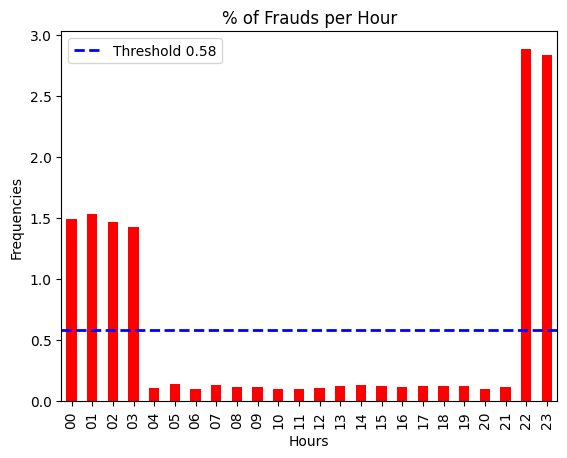

In [ ]:
((df2[df2['is_fraud'] == 1].groupby('hour').size()*100)/df2.groupby("hour").size()).plot(kind = 'bar', color = 'r')
plt.axhline(y=0.58,color="b",linestyle="--",linewidth=2, label="Threshold 0.58")
plt.title('% of Frauds per Hour')
plt.xlabel('Hours')
plt.ylabel('Frequencies')
plt.legend()
plt.show()

In [ ]:
df1=df1.drop("trans_date_trans_time",axis=1)
df1=pd.merge(df1,df2[["d","ym","hour"]],left_index=True, right_index=True)
df1.dtypes

,0
merchant,category
category,category
amt,float64
gender,category
city,category
state,category
city_pop,int64
job,category
is_fraud,category
distance,float64


In [ ]:
round((df2["category"].value_counts() * 100) / len(df2),2)

,count
category,
gas_transport,10.15
grocery_pos,9.54
home,9.49
shopping_pos,9.00
kids_pets,8.72
shopping_net,7.52
entertainment,7.25
food_dining,7.05
personal_care,7.00


In [ ]:
df_percentages = pd.concat([
    (df2["category"].value_counts() * 100) / len(df2),
    (df2[df2['is_fraud'] == 1].groupby('category').size() * 100) / df2.groupby("category").size()]
, axis=1, keys=['% Transaction x Category', '% of Total Frauds x Category']).round(2)

print(df_percentages)

                % Transaction x Category  % of Total Frauds x Category
category                                                              
gas_transport                      10.15                          0.47
grocery_pos                         9.54                          1.41
home                                9.49                          0.16
shopping_pos                        9.00                          0.72
kids_pets                           8.72                          0.21
shopping_net                        7.52                          1.76
entertainment                       7.25                          0.25
food_dining                         7.05                          0.17
personal_care                       7.00                          0.24
health_fitness                      6.62                          0.15
misc_pos                            6.14                          0.31
misc_net                            4.88                          1.45
grocer

<ipython-input-30-231f4c6f8bc5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df2[df2['is_fraud'] == 1].groupby('category').size() * 100) / df2.groupby("category").size()]
<ipython-input-30-231f4c6f8bc5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df2[df2['is_fraud'] == 1].groupby('category').size() * 100) / df2.groupby("category").size()]


<ipython-input-31-0325dba4c1f6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df2[df2['is_fraud'] == 1].groupby('category').size() * 100) / len(df2[df2['is_fraud'] == 1])


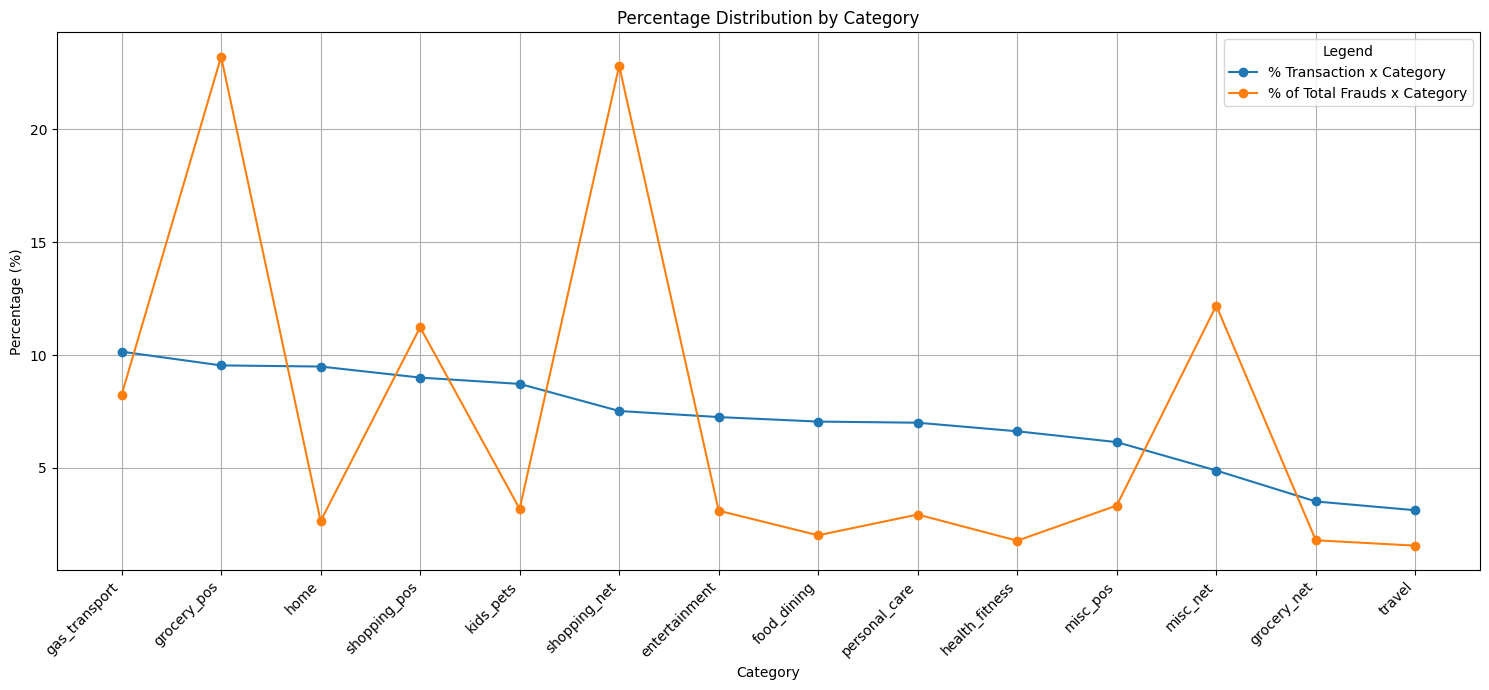

In [ ]:
df2_percentages = pd.concat([
    (df2["category"].value_counts() * 100) / len(df),
    (df2[df2['is_fraud'] == 1].groupby('category').size() * 100) / len(df2[df2['is_fraud'] == 1])
], axis=1, keys=['% Transaction x Category', '% of Total Frauds x Category']).round(2)

ax = df2_percentages.plot(kind='line', marker='o', figsize=(15, 7))
plt.title('Percentage Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
ax.set_xticks(range(len(df2_percentages)))
ax.set_xticklabels(df2_percentages.index, rotation=45, ha="right")
plt.grid(True)
plt.legend(title='Legend')
plt.tight_layout()
plt.show()

<ipython-input-32-548bc434ecc4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab=round((df1[df1['is_fraud'] == 1].groupby('category').size() * 100) / df1.groupby('category').size(),2).sort_values(ascending=False)
<ipython-input-32-548bc434ecc4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab=round((df1[df1['is_fraud'] == 1].groupby('category').size() * 100) / df1.groupby('category').size(),2).sort_values(ascending=False)
<ipython-input-32-548bc434ecc4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain

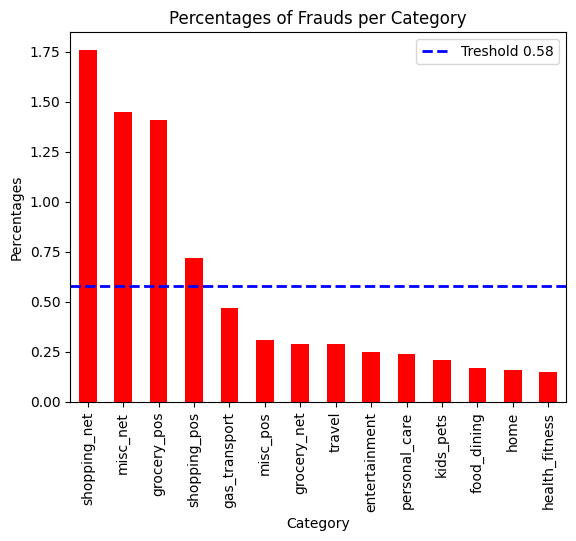

category
shopping_net      1.76
misc_net          1.45
grocery_pos       1.41
shopping_pos      0.72
gas_transport     0.47
misc_pos          0.31
grocery_net       0.29
travel            0.29
entertainment     0.25
personal_care     0.24
kids_pets         0.21
food_dining       0.17
home              0.16
health_fitness    0.15
dtype: float64


In [ ]:
tab=round((df1[df1['is_fraud'] == 1].groupby('category').size() * 100) / df1.groupby('category').size(),2).sort_values(ascending=False)
ax=(round((df2[df2['is_fraud'] == 1].groupby('category').size() * 100) / df2.groupby('category').size(),2).sort_values(ascending=False)).plot(kind='bar',color="r")
plt.title('Percentages of Frauds per Category')
plt.xlabel('Category')
plt.ylabel('Percentages')
plt.axhline(y=0.58,linestyle="--",color="b",linewidth=2,label="Treshold 0.58")
plt.legend()
plt.show()
plt.show()
print(tab)

<ipython-input-33-6f0705d0ba04>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a=round((df2[df2['is_fraud'] == 1].groupby('category').size() * 100) / df2.groupby('category').size(),2).sort_values(ascending=False)
<ipython-input-33-6f0705d0ba04>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a=round((df2[df2['is_fraud'] == 1].groupby('category').size() * 100) / df2.groupby('category').size(),2).sort_values(ascending=False)


Text(0.5, 1.0, '% Fraudelent Transactions per Category - % Fraudulent Transactions in the Whole Dataset')

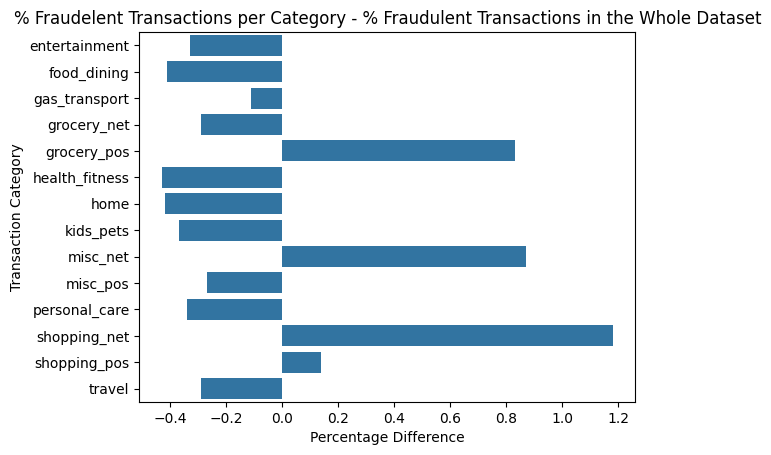

In [ ]:
import seaborn as sns
c = 0.58
a=round((df2[df2['is_fraud'] == 1].groupby('category').size() * 100) / df2.groupby('category').size(),2).sort_values(ascending=False)
b=a-c
b_df = b.reset_index()
b_df.columns = ['category', 'difference']
ax=sns.barplot(y='category',x='difference',data=b_df.sort_values('difference',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('% Fraudelent Transactions per Category - % Fraudulent Transactions in the Whole Dataset')

In [ ]:
df2_percentages = pd.concat([
    (df2['gender'].value_counts()*100)/len(df2),
    (df2[df2['is_fraud'] == 1].groupby('gender').size() * 100) / len(df2[df2['is_fraud'] == 1])
], axis=1, keys=['% Gender Distribution', '% of Frauds for each Gender']).round(2)

print(df2_percentages)

        % Gender Distribution  % of Frauds for each Gender
gender                                                    
F                       54.74                        49.76
M                       45.26                        50.24


<ipython-input-34-617ef642db90>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df2[df2['is_fraud'] == 1].groupby('gender').size() * 100) / len(df2[df2['is_fraud'] == 1])


<ipython-input-35-96d026c2796f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=((df2[df2['is_fraud'] == 1].groupby('state').size() * 100) / df2.groupby('state').size()).plot(kind="bar",figsize=(15,7))
<ipython-input-35-96d026c2796f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=((df2[df2['is_fraud'] == 1].groupby('state').size() * 100) / df2.groupby('state').size()).plot(kind="bar",figsize=(15,7))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'AK'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AR'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'CT'),
  Text(7, 0, 'DC'),
  Text(8, 0, 'DE'),
  Text(9, 0, 'FL'),
  Text(10, 0, 'GA'),
  Text(11, 0, 'HI'),
  Text(12, 0, 'IA'),
  Text(13, 0, 'ID'),
  Text(14, 0, 'IL'),
  Text(15, 0, 'IN'),
  Text(16, 0, 'KS'),
  Text(17, 0, 'KY'),
  Text(18, 0, 'LA'),
  Text(19, 0, 'MA'),
  Text(20, 0, 'MD'),
  Text(21, 0, 'ME'),
  Text(22, 0, 'MI'),
  Text(23, 0, 'MN'),
  Text(24, 0, 'MO'),
  Text(25, 0, 'MS'),
  Text(26, 0, 'MT'),
  Text(27, 0, 'NC'),
  Text(28, 0, 'ND'),
  Text(29, 0, 'NE'),
  Text(30, 0, 'NH'),
  Text(31, 0, 'NJ'),
  Text(32, 0, 'NM'),
  Text(33, 0, 'NV'),
  Text(34, 0, 'NY'),
  Text(35, 0, 'OH'),
  Text(36, 0, 'OK'),
  T

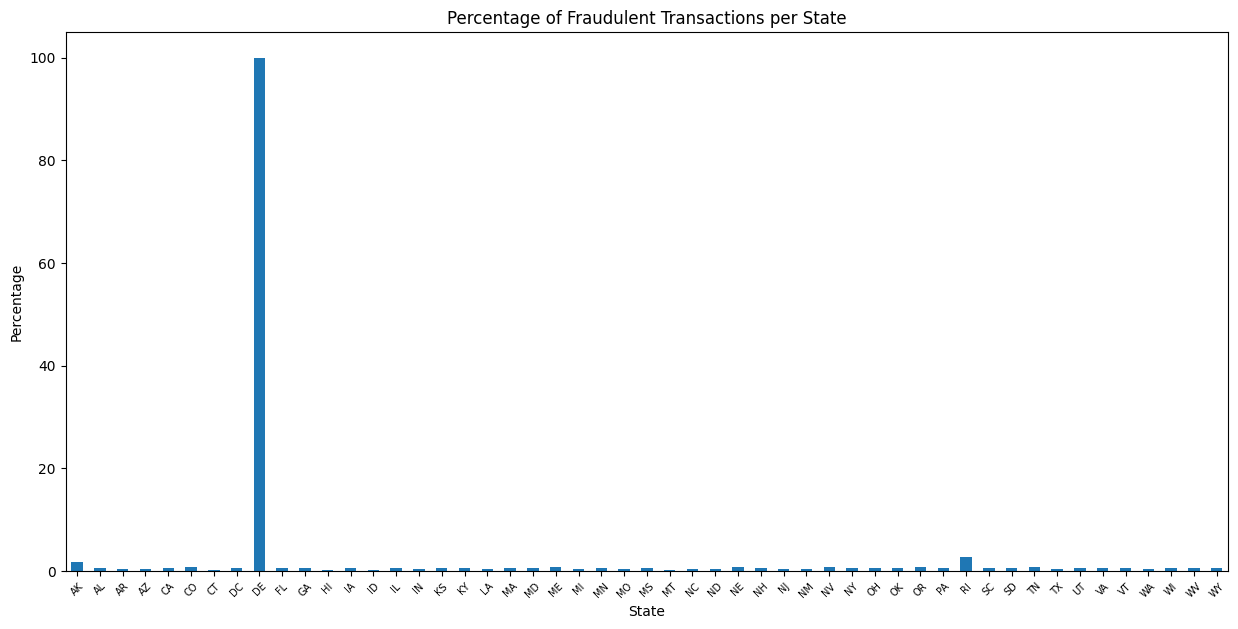

In [ ]:
ax=((df2[df2['is_fraud'] == 1].groupby('state').size() * 100) / df2.groupby('state').size()).plot(kind="bar",figsize=(15,7))
plt.title("Percentage of Fraudulent Transactions per State")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.xticks(rotation=45, fontsize=7)

In [ ]:
df[df["state"]=="DE"].head(100)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
233631,2019-04-28 00:41:37,6011826317034777,fraud_Schamberger-O'Keefe,grocery_pos,294.91,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,...,38.679,-75.3932,18799,"Designer, multimedia",2000-03-16,8f85e701f609911b99bea627eb71aa49,1335573697,38.166715,-75.023367,1
233744,2019-04-28 01:49:28,6011826317034777,fraud_Kuphal-Predovic,misc_net,868.29,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,...,38.679,-75.3932,18799,"Designer, multimedia",2000-03-16,8c941f2849ccac44d32ef08ea784fc67,1335577768,38.910900,-74.856625,1
233826,2019-04-28 02:33:09,6011826317034777,fraud_Goodwin-Nitzsche,grocery_pos,280.26,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,...,38.679,-75.3932,18799,"Designer, multimedia",2000-03-16,0fc1109cb9a10961595e79736ccc1293,1335580389,38.523208,-74.460889,1
234625,2019-04-28 10:24:34,6011826317034777,"fraud_Huel, Hammes and Witting",grocery_pos,296.25,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,...,38.679,-75.3932,18799,"Designer, multimedia",2000-03-16,b4248cfc8b44fec6193767918d49b334,1335608674,38.593896,-76.031493,1
236522,2019-04-28 23:03:24,6011826317034777,fraud_Waters-Cruickshank,health_fitness,20.58,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,...,38.679,-75.3932,18799,"Designer, multimedia",2000-03-16,567ed9b2d7d10ad519cdd697cd338f70,1335654204,39.003922,-75.852152,1
236643,2019-04-28 23:41:43,6011826317034777,fraud_Cormier LLC,shopping_net,1012.77,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,...,38.679,-75.3932,18799,"Designer, multimedia",2000-03-16,00d158609d7ac753da792e9d0eb88a0b,1335656503,39.596186,-75.559281,1
237095,2019-04-29 03:29:41,6011826317034777,fraud_Ruecker Group,misc_net,885.96,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,...,38.679,-75.3932,18799,"Designer, multimedia",2000-03-16,e0613e4142b2d05867299832ac453e01,1335670181,39.666374,-76.358642,1
237740,2019-04-29 10:13:47,6011826317034777,fraud_Smitham-Schiller,grocery_net,10.93,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,...,38.679,-75.3932,18799,"Designer, multimedia",2000-03-16,788a8fea8199a4e8a6a47ffab824e571,1335694427,37.691598,-76.058416,1
239854,2019-04-29 23:51:22,6011826317034777,"fraud_Baumbach, Feeney and Morar",shopping_net,960.49,Christine,Johnson,F,9612 Robert Light Apt. 340,Georgetown,...,38.679,-75.3932,18799,"Designer, multimedia",2000-03-16,4193b953223a1c9432f9d3c380e67be9,1335743482,39.073319,-75.545153,1


<ipython-input-37-36577ec7f6cb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=((df2bis[df2bis['is_fraud'] == 1].groupby('state').size() * 100) / df2bis.groupby('state').size()).plot(kind="bar",figsize=(15,7))
<ipython-input-37-36577ec7f6cb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=((df2bis[df2bis['is_fraud'] == 1].groupby('state').size() * 100) / df2bis.groupby('state').size()).plot(kind="bar",figsize=(15,7))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'AK'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AR'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'CT'),
  Text(7, 0, 'DC'),
  Text(8, 0, 'DE'),
  Text(9, 0, 'FL'),
  Text(10, 0, 'GA'),
  Text(11, 0, 'HI'),
  Text(12, 0, 'IA'),
  Text(13, 0, 'ID'),
  Text(14, 0, 'IL'),
  Text(15, 0, 'IN'),
  Text(16, 0, 'KS'),
  Text(17, 0, 'KY'),
  Text(18, 0, 'LA'),
  Text(19, 0, 'MA'),
  Text(20, 0, 'MD'),
  Text(21, 0, 'ME'),
  Text(22, 0, 'MI'),
  Text(23, 0, 'MN'),
  Text(24, 0, 'MO'),
  Text(25, 0, 'MS'),
  Text(26, 0, 'MT'),
  Text(27, 0, 'NC'),
  Text(28, 0, 'ND'),
  Text(29, 0, 'NE'),
  Text(30, 0, 'NH'),
  Text(31, 0, 'NJ'),
  Text(32, 0, 'NM'),
  Text(33, 0, 'NV'),
  Text(34, 0, 'NY'),
  Text(35, 0, 'OH'),
  Text(36, 0, 'OK'),
  T

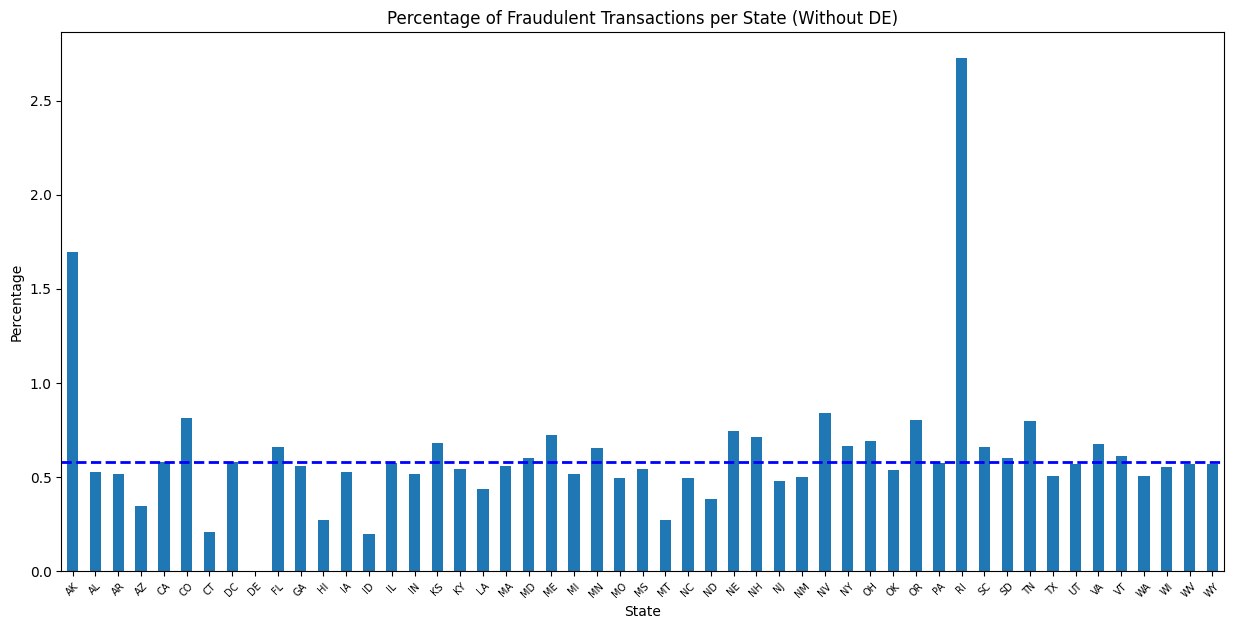

In [ ]:
df2bis=df2[df2["state"]!="DE"]
ax=((df2bis[df2bis['is_fraud'] == 1].groupby('state').size() * 100) / df2bis.groupby('state').size()).plot(kind="bar",figsize=(15,7))
plt.axhline(y=0.58,color="b",linestyle="--",linewidth=2,label="Treshold 0.58")
plt.title("Percentage of Fraudulent Transactions per State (Without DE)")
plt.xlabel("State")
plt.ylabel("Percentage")
plt.xticks(rotation=45, fontsize=7)

In [ ]:
df1[["job","merchant","city"]].describe()

,job,merchant,city
count,1296675,1296675,1296675
unique,494,693,894
top,Film/video editor,fraud_Kilback LLC,Birmingham
freq,9779,4403,5617


In [ ]:
dfnum=df1[['amt',"city_pop","age","distance","is_fraud"]]

In [ ]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = dfnum.corr()
corr.style.background_gradient(cmap='coolwarm')

,amt,city_pop,age,distance,is_fraud
amt,1.000000,0.005818,-0.009753,-0.001085,0.219404
city_pop,0.005818,1.000000,-0.092451,0.010901,0.002136
age,-0.009753,-0.092451,1.000000,-0.004592,0.012244
distance,-0.001085,0.010901,-0.004592,1.000000,0.000403
is_fraud,0.219404,0.002136,0.012244,0.000403,1.000000


In [ ]:
df2["age"].describe()

,age
count,1.296675e+06
mean,4.552822e+01
std,1.740895e+01
min,1.300000e+01
25%,3.200000e+01
50%,4.400000e+01
75%,5.700000e+01
max,9.500000e+01


<ipython-input-42-edbd87f2e0d4>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=((df2[df2["is_fraud"]==1].groupby("age2").size()*100)/df2.groupby("age2").size()).plot(kind="bar")
<ipython-input-42-edbd87f2e0d4>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=((df2[df2["is_fraud"]==1].groupby("age2").size()*100)/df2.groupby("age2").size()).plot(kind="bar")


Text(0, 0.5, 'Percentage')

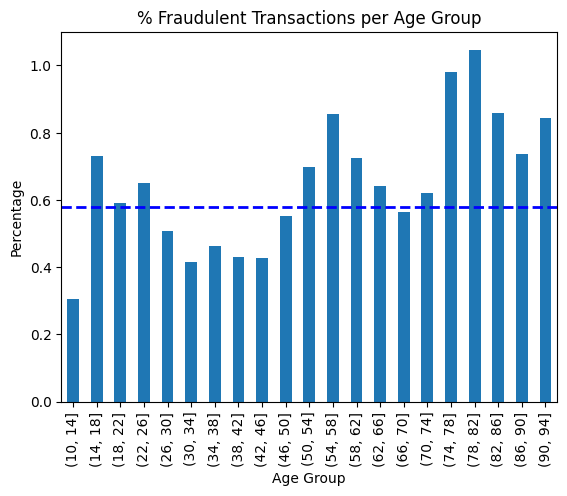

In [ ]:
bins=[i for i in range (10,96,4)]
df2["age2"]=pd.cut(df2["age"],bins=bins)
ax=((df2[df2["is_fraud"]==1].groupby("age2").size()*100)/df2.groupby("age2").size()).plot(kind="bar")
plt.axhline(y=0.58, color="blue", linestyle="--", linewidth=2, label="Threshold 0.58")
plt.title("% Fraudulent Transactions per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage")

In [ ]:
df2["distance"].describe()

,distance
count,1.296675e+06
mean,7.611476e+01
std,2.911698e+01
min,2.200000e-02
25%,5.533500e+01
50%,7.823200e+01
75%,9.850300e+01
max,1.521170e+02


Text(0, 0.5, 'Frequency')

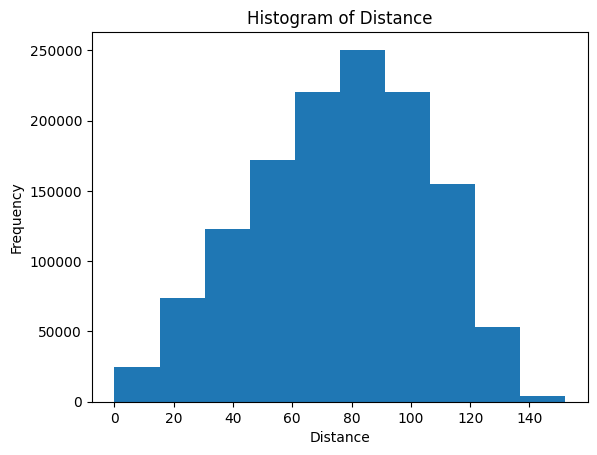

In [ ]:
ax=df2["distance"].plot(kind="hist")
plt.title("Histogram of Distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")

<ipython-input-45-6ee4597febd1>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=((df2[df2["is_fraud"]==1].groupby("distance").size()*100)/df2.groupby("distance").size()).plot(kind="bar",color="r")
<ipython-input-45-6ee4597febd1>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=((df2[df2["is_fraud"]==1].groupby("distance").size()*100)/df2.groupby("distance").size()).plot(kind="bar",color="r")
<ipython-input-45-6ee4597febd1>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tr

distance
(0, 10]       0.50
(10, 20]      0.53
(20, 30]      0.55
(30, 40]      0.57
(40, 50]      0.57
(50, 60]      0.60
(60, 70]      0.61
(70, 80]      0.59
(80, 90]      0.57
(90, 100]     0.58
(100, 110]    0.58
(110, 120]    0.58
(120, 130]    0.57
(130, 140]    0.53
(140, 150]    0.62
(150, 160]    0.00
dtype: float64


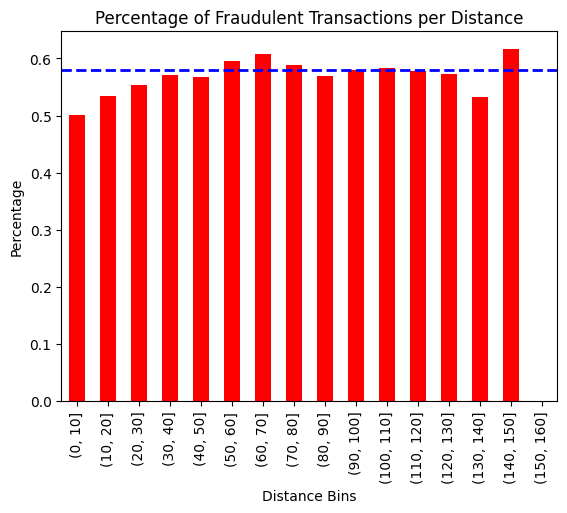

In [ ]:
bins=[i for i in range (0,161,10)]
df2["distance"]=pd.cut(df2["distance"],bins=bins)
df2["distance"] = df2["distance"].astype('category')
ax=((df2[df2["is_fraud"]==1].groupby("distance").size()*100)/df2.groupby("distance").size()).plot(kind="bar",color="r")
plt.axhline(y=0.58, color="blue", linestyle="--", linewidth=2, label="Threshold 0.58")
plt.title("Percentage of Fraudulent Transactions per Distance")
plt.xlabel("Distance Bins")
plt.ylabel("Percentage")
print(round((df2[df2["is_fraud"]==1].groupby("distance").size()*100)/df2.groupby("distance").size(),2))
plt.show()

In [ ]:
df2["amt"].describe()

,amt
count,1.296675e+06
mean,7.035104e+01
std,1.603160e+02
min,1.000000e+00
25%,9.650000e+00
50%,4.752000e+01
75%,8.314000e+01
max,2.894890e+04


In [ ]:
df2["amt_bins"] = pd.qcut(df2["amt"], q=20, duplicates='drop')
df_percentages = pd.concat([
    df2["amt_bins"].value_counts(sort=False),
    ((df2["amt_bins"].value_counts(sort=False) * 100) / len(df2)),
    (round(df2[df2["is_fraud"] == 1].groupby("amt_bins").size() * 100 /
           df2.groupby("amt_bins").size(), 2))
], axis=1, keys=['Transactions x Bins', "% Transactions x Bins", '% Frauds x Bin']).round(2)
print(df_percentages)

                   Transactions x Bins  % Transactions x Bins  % Frauds x Bin
amt_bins                                                                     
(0.999, 2.44]                    64868                   5.00            0.01
(2.44, 4.11]                     64927                   5.01            0.02
(4.11, 5.9]                      64983                   5.01            0.02
(5.9, 7.75]                      64901                   5.01            0.22
(7.75, 9.65]                     64646                   4.99            0.44
(9.65, 15.74]                    64751                   4.99            0.66
(15.74, 23.74]                   64816                   5.00            0.98
(23.74, 32.13]                   64814                   5.00            0.05
(32.13, 40.14]                   64819                   5.00            0.00
(40.14, 47.52]                   64887                   5.00            0.01
(47.52, 54.15]                   64802                   5.00   

<ipython-input-47-6a02bb601bf6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (round(df2[df2["is_fraud"] == 1].groupby("amt_bins").size() * 100 /
<ipython-input-47-6a02bb601bf6>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby("amt_bins").size(), 2))


In [ ]:
bins=[i for i in range(0, 1000,100)]+ [float('inf')]
df2["amt_bins"]=pd.cut(df2["amt"],bins=bins,right=False)
df_percentages = pd.concat([
    df2["amt_bins"].value_counts(sort=False),
    ((df2["amt_bins"].value_counts(sort=False)*100)/len(df2)),
    (round(df2[df2["is_fraud"]==1].groupby("amt_bins").size()*100/df2.groupby("amt_bins").size(),2))
], axis=1, keys=['Transactions x Bins',"% Transactions x Bins" ,'% of Frauds x Bin']).round(2)
print(df_percentages)

                Transactions x Bins  % Transactions x Bins  % of Frauds x Bin
amt_bins                                                                     
[0.0, 100.0)                1061728                  81.88               0.16
[100.0, 200.0)               173017                  13.34               0.09
[200.0, 300.0)                31631                   2.44               2.51
[300.0, 400.0)                 8600                   0.66              13.49
[400.0, 500.0)                 6068                   0.47               1.66
[500.0, 600.0)                 4558                   0.35               2.06
[600.0, 700.0)                 1945                   0.15               8.59
[700.0, 800.0)                 1910                   0.15              34.71
[800.0, 900.0)                 1679                   0.13              49.49
[900.0, inf)                   5539                   0.43              34.18


<ipython-input-48-216bc82d4e45>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (round(df2[df2["is_fraud"]==1].groupby("amt_bins").size()*100/df2.groupby("amt_bins").size(),2))
<ipython-input-48-216bc82d4e45>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (round(df2[df2["is_fraud"]==1].groupby("amt_bins").size()*100/df2.groupby("amt_bins").size(),2))


In [ ]:
bins=[i for i in range(0, 201,200)]+ [float('inf')]
df2["amt_bins"]=pd.cut(df2["amt"],bins=bins,right=False)
df_percentages = pd.concat([
    ((df2["amt_bins"].value_counts(sort=False)*100)/len(df2)),
    (round(df2[df2["is_fraud"]==1].groupby("amt_bins").size()*100/df2.groupby("amt_bins").size(),2)),
    (round(df2[df2["is_fraud"]==1].groupby("amt_bins").size()*100/len(df2[df2['is_fraud'] == 1]),2))
], axis=1, keys=['% Transaction of Dataset', '% of Frauds x Bin',"% of Total Frauds"]).round(2)
print(df_percentages)

              % Transaction of Dataset  % of Frauds x Bin  % of Total Frauds
amt_bins                                                                    
[0.0, 200.0)                     95.22               0.15              24.01
[200.0, inf)                      4.78               9.21              75.99


<ipython-input-49-a477c65feacf>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (round(df2[df2["is_fraud"]==1].groupby("amt_bins").size()*100/df2.groupby("amt_bins").size(),2)),
<ipython-input-49-a477c65feacf>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (round(df2[df2["is_fraud"]==1].groupby("amt_bins").size()*100/df2.groupby("amt_bins").size(),2)),
<ipython-input-49-a477c65feacf>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

In [ ]:
df2["city_pop"].describe()

,city_pop
count,1.296675e+06
mean,8.882444e+04
std,3.019564e+05
min,2.300000e+01
25%,7.430000e+02
50%,2.456000e+03
75%,2.032800e+04
max,2.906700e+06


In [ ]:
df2=df1.copy()

In [ ]:
df2["city_bins"] = pd.qcut(df2["city_pop"], q=15)
transactions_per_bin = df2["city_bins"].value_counts(sort=False)
percent_transactions_per_bin = (transactions_per_bin * 100 / len(df2)).round(2)
fraud_percent_per_bin = (
    (df2[df2["is_fraud"] == 1].groupby("city_bins").size() * 100 / df2.groupby("city_bins").size())
    .fillna(0)
    .round(2)
)

df_percentages = pd.concat([
    transactions_per_bin,
    percent_transactions_per_bin,
    fraud_percent_per_bin
], axis=1, keys=['Transactions x Bin', '%Transactions x Bin', '% Frauds x Bin']).round(2)

print(df_percentages)


                       Transactions x Bin  %Transactions x Bin  % Frauds x Bin
city_bins                                                                     
(22.999, 184.0]                     87965                 6.78            0.62
(184.0, 337.0]                      85534                 6.60            0.61
(337.0, 566.0]                      85976                 6.63            0.55
(566.0, 804.0]                      87084                 6.72            0.52
(804.0, 1178.0]                     86199                 6.65            0.56
(1178.0, 1631.0]                    87388                 6.74            0.55
(1631.0, 2092.0]                    85359                 6.58            0.54
(2092.0, 3202.0]                    87469                 6.75            0.56
(3202.0, 4680.0]                    85291                 6.58            0.61
(4680.0, 6841.0]                    86735                 6.69            0.51
(6841.0, 17867.0]                   86705           

<ipython-input-52-197bf9d4f423>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df2[df2["is_fraud"] == 1].groupby("city_bins").size() * 100 / df2.groupby("city_bins").size())
<ipython-input-52-197bf9d4f423>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df2[df2["is_fraud"] == 1].groupby("city_bins").size() * 100 / df2.groupby("city_bins").size())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(22.999, 184.0]'),
  Text(1, 0, '(184.0, 337.0]'),
  Text(2, 0, '(337.0, 566.0]'),
  Text(3, 0, '(566.0, 804.0]'),
  Text(4, 0, '(804.0, 1178.0]'),
  Text(5, 0, '(1178.0, 1631.0]'),
  Text(6, 0, '(1631.0, 2092.0]'),
  Text(7, 0, '(2092.0, 3202.0]'),
  Text(8, 0, '(3202.0, 4680.0]'),
  Text(9, 0, '(4680.0, 6841.0]'),
  Text(10, 0, '(6841.0, 17867.0]'),
  Text(11, 0, '(17867.0, 42384.0]'),
  Text(12, 0, '(42384.0, 105638.0]'),
  Text(13, 0, '(105638.0, 333497.0]'),
  Text(14, 0, '(333497.0, 2906700.0]')])

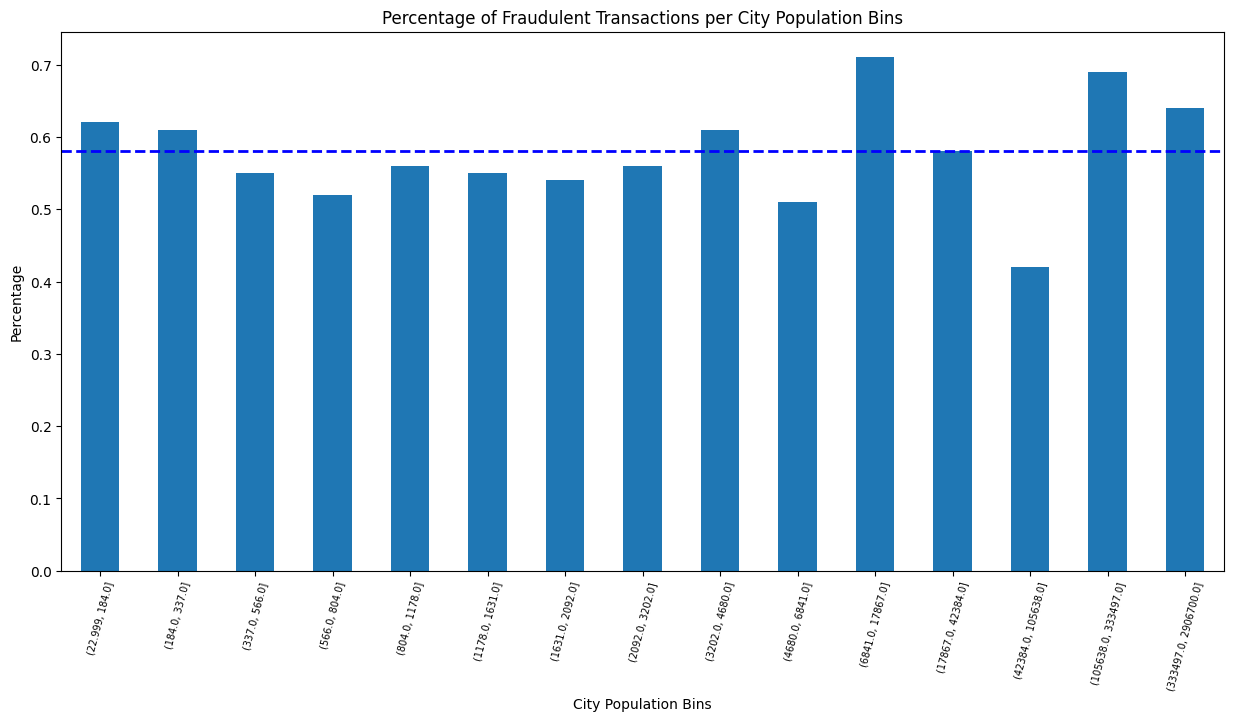

In [ ]:
df_percentages['% Frauds x Bin'].plot(kind="bar",figsize=(15,7))
plt.axhline(y=0.58, color="blue", linestyle="--", linewidth=2, label="Threshold 0.58")
plt.title("Percentage of Fraudulent Transactions per City Population Bins")
plt.xlabel("City Population Bins")
plt.ylabel("Percentage")
plt.xticks(rotation=75, fontsize=7)

In [ ]:
dftest = pd.read_csv(path+'/fraudTest.csv')
dftest = dftest.drop(['Unnamed: 0'], axis = 1)
dftest.dtypes

,0
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object
city,object


In [ ]:
for i in (1,2,3, 7,8,9,10,15,21):
  dftest[dftest.columns[i]] = dftest[dftest.columns[i]].astype('category')

for i in (5,6,17):
  dftest[dftest.columns[i]] = dftest[dftest.columns[i]].astype('string')

dftest['trans_date_trans_time'] = pd.to_datetime(dftest['trans_date_trans_time'],errors="coerce")
dftest['dob'] = pd.to_datetime(dftest['dob'])

In [ ]:
dftest = dftest.drop(["cc_num","first","last","trans_num"], axis = 1)

from haversine import haversine_vector, Unit
dftest["distance"]=0
for i in range (len(dftest)):
  dftest["distance"][i]=haversine_vector((dftest["lat"][i], dftest["long"][i]), (dftest["merch_lat"][i],dftest["merch_long"][i]), unit=Unit.KILOMETERS)
dftest["distance"]=np.round(dftest["distance"],3)

dftest=dftest.drop(["lat","long","merch_lat","merch_long"],axis=1)

dftest=dftest.drop(["unix_time"],axis=1)

dftest['age'] = (dftest['trans_date_trans_time'] - dftest['dob']).dt.days // 365
dftest['age'] = dftest['age'].astype('int')

dftest=dftest.drop(["dob"],axis=1)

dftest=dftest.drop(["zip","street"],axis=1)

dftest['d'] = dftest['trans_date_trans_time'].dt.day_name()
dftest["d"] = dftest["d"].astype("category")

dftest['ym'] = dftest['trans_date_trans_time'].dt.strftime('%Y-%m')
dftest["ym"] = dftest["ym"].astype("category")

dftest['hour'] = dftest['trans_date_trans_time'].dt.strftime('%H')
dftest["hour"] = dftest["hour"].astype("category")

dftest=dftest.drop(["trans_date_trans_time"],axis=1)

<ipython-input-56-357ddc30ae71>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dftest["distance"][i]=haversine_vector((dftest["lat"][i], dftest["long"][i]), (dftest["merch_lat"][i],dftest["merch_long"][i]), unit=Unit.KILOMETERS)
<ipython-i

In [ ]:
X_test = dftest.drop('is_fraud', axis=1)
y_test = dftest['is_fraud']
X_train = df1.drop('is_fraud', axis=1)
y_train = df1['is_fraud']

In [ ]:
print(X_train["ym"].value_counts())
print(X_test["ym"].value_counts())

ym
2019-12    141060
2019-08     87359
2019-07     86596
2019-06     86064
2020-05     74343
2020-03     72850
2019-05     72532
2019-03     70939
2019-09     70652
2019-11     70421
2019-10     68758
2019-04     68078
2020-04     66892
2020-06     57747
2019-01     52525
2020-01     52202
2019-02     49866
2020-02     47791
Name: count, dtype: int64
ym
2020-12    139538
2020-08     88759
2020-07     85848
2020-11     72635
2020-09     69533
2020-10     69348
2020-06     30058
Name: count, dtype: int64


In [ ]:
set(X_train["state"].unique())-set(X_test["state"].unique())

{'DE'}

In [ ]:
X_train["state"].unique()

['NC', 'WA', 'ID', 'MT', 'VA', ..., 'AK', 'ND', 'CT', 'RI', 'DE']
Length: 51
Categories (51, object): ['AK', 'AL', 'AR', 'AZ', ..., 'WA', 'WI', 'WV', 'WY']

In [ ]:
X_test["ym"].value_counts()

,count
ym,
2020-12,139538
2020-08,88759
2020-07,85848
2020-11,72635
2020-09,69533
2020-10,69348
2020-06,30058


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
print(df1["is_fraud"].value_counts())
print(y_train_resampled.value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
is_fraud
0    7506
1    7506
Name: count, dtype: int64


In [ ]:
EDAX_train_res=X_train_resampled[["d","ym","hour","category","state","gender","age","amt"]]
EDAX_train_res.dtypes

,0
d,category
ym,category
hour,category
category,category
state,category
gender,category
age,int64
amt,float64


In [ ]:
EDAX_test=X_test[["d","ym","hour","category","state","gender","age","amt"]]

In [ ]:
EDAX_test["ym"].value_counts()

,count
ym,
2020-12,139538
2020-08,88759
2020-07,85848
2020-11,72635
2020-09,69533
2020-10,69348
2020-06,30058


In [ ]:
EDAX_test1=EDAX_test.copy()
EDAX_train_res1=EDAX_train_res.copy()
EDAX_test1["ym"]= [s[5:] for s in EDAX_test1["ym"]]
EDAX_train_res1["ym"]= [s[5:] for s in EDAX_train_res1["ym"]]
EDAX_train_res1= pd.get_dummies(EDAX_train_res1, columns=['d',"ym","hour","category","state","gender"], drop_first=False)
EDAX_test1= pd.get_dummies(EDAX_test1, columns=['d',"ym","hour","category","state","gender"], drop_first=False)

In [ ]:
EDAX_train_res1=EDAX_train_res1.drop(["state_DE"],axis=1)
EDAX_test1["ym_01"]=0
EDAX_test1["ym_02"]=0
EDAX_test1["ym_03"]=0
EDAX_test1["ym_04"]=0
EDAX_test1["ym_05"]=0

In [ ]:
EDAX_test1=EDAX_test1[EDAX_train_res1.columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
EDAX_train_res1scaled= scaler.fit_transform(EDAX_train_res1)
EDAX_test1scaled = scaler.transform(EDAX_test1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg1= LogisticRegression(random_state=1, max_iter=1000, solver='lbfgs')
logreg1.fit(EDAX_train_res1scaled, y_train_resampled)
y_pred1=logreg1.predict(EDAX_test1scaled)

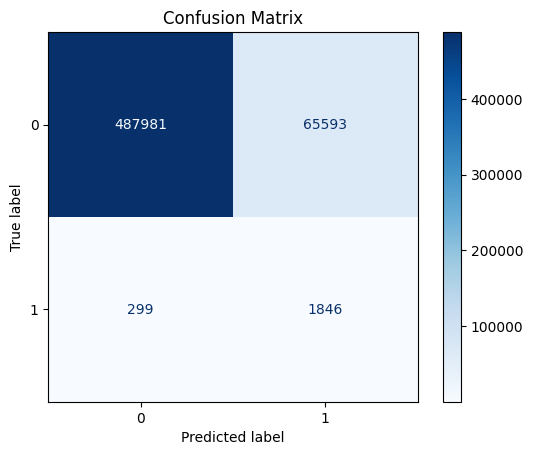

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg1.classes_)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


0:	learn: 0.9427376	total: 118ms	remaining: 58.7s
100:	learn: 0.9863760	total: 6.2s	remaining: 24.5s
200:	learn: 0.9919585	total: 12.3s	remaining: 18.4s
300:	learn: 0.9948159	total: 20.3s	remaining: 13.4s
400:	learn: 0.9964749	total: 26.1s	remaining: 6.44s
499:	learn: 0.9977376	total: 33.6s	remaining: 0us


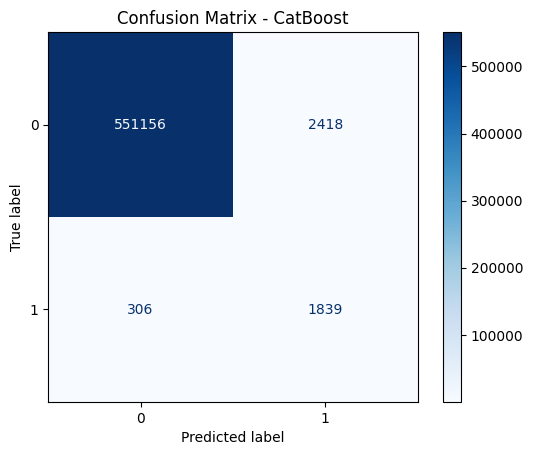

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.43      0.86      0.57      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.93      0.79    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
categorical_features = ['d', 'ym', 'hour',"category","state","gender"]
# Initialize the CatBoostClassifier
catboost_model1 = CatBoostClassifier(
    iterations=500,         # Number of boosting iterations
    learning_rate=0.1,      # Learning rate
    depth=6,                # Depth of the tree
    random_seed=1,          # For reproducibility
    verbose=100,            # Print training progress every 100 iterations
    eval_metric='F1',       # Evaluation metric
)

catboost_model1.fit(
    EDAX_train_res,         # Training data
    y_train_resampled,      # Target variable
    cat_features=categorical_features  # Specify categorical features
)
# Predict on the test set
y_pred2 = catboost_model1.predict(EDAX_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_model1.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - CatBoost')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5245, in 

Best Parameters Found:  {'l2_leaf_reg': 4, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 300, 'rsm': 0.7}


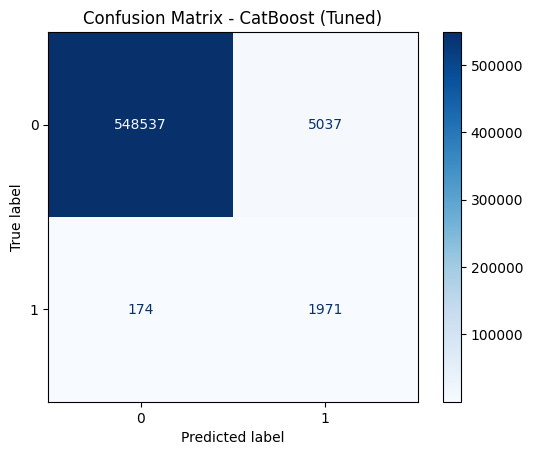

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.utils import parallel_backend
import matplotlib.pyplot as plt
from scipy.stats import randint

# Specify the parameter distribution for RandomizedSearchCV
param_dist = {
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.15],
    "max_depth": randint(4, 6),                # Depth of the tree
    "n_estimators": [200, 300, 400],          # Number of estimators (boosting iterations)
    "l2_leaf_reg": [1, 2, 3, 4],              # L2 regularization coefficient
    "rsm": [0.5, 0.7, 0.9, 1, 1.1],          # Random subspace sampling (feature sampling)
}

# Initialize the CatBoostClassifier
model = CatBoostClassifier(
    random_seed=1,      # For reproducibility
    cat_features=['d', 'ym', 'hour', "category", "state", "gender"],  # Specify categorical features
    verbose=0           # Disable verbose training for the search
)

# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

with parallel_backend('threading', n_jobs=-1):
    rscv2 = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring='f1',  # Scoring metric
        cv=cv,
        n_iter=20,     # Number of random parameter combinations to try
        random_state=1
    )
    rscv2.fit(EDAX_train_res, y_train_resampled)

# Print the best parameters found
print("Best Parameters Found: ", rscv2.best_params_)

# Train the best model on the full training set
best_model = rscv2.best_estimator_
best_model.fit(EDAX_train_res, y_train_resampled)

# Predict on the test set
y_pred4 = best_model.predict(EDAX_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred4)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - CatBoost (Tuned)')
plt.show()


Performing RandomizedSearchCV for Hyperparameter Tuning...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)


Best Parameters Found:  {'l2_leaf_reg': 3, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 350, 'rsm': 0.7}


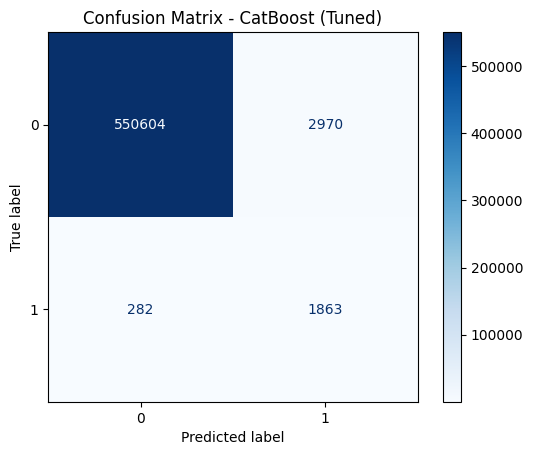

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.utils import parallel_backend
import matplotlib.pyplot as plt
from scipy.stats import randint

# Specify the parameter distribution for RandomizedSearchCV
param_dist = {
    "learning_rate": [0.1, 0.12, 0.15, 0.18],  # Focalizzati attorno al valore migliore
    "max_depth": randint(4, 7),               # Range leggermente ristretto
    "n_estimators": [250, 300, 350],          # Range centrato su 300
    "l2_leaf_reg": [3, 4, 5, 6],              # Estendi verso l'alto
    "rsm": [0.6, 0.7, 0.8],                   # Range focalizzato
}

# Initialize the CatBoostClassifier
model = CatBoostClassifier(
    random_seed=1,      # For reproducibility
    cat_features=['d', 'ym', 'hour', "category", "state", "gender"],  # Specify categorical features
    verbose=0           # Disable verbose training for the search
)

# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Perform RandomizedSearchCV with parallel processing
print("Performing RandomizedSearchCV for Hyperparameter Tuning...")
with parallel_backend('threading', n_jobs=-1):
    rscv = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring='f1',  # Scoring metric
        cv=cv,
        n_iter=20,     # Number of random parameter combinations to try
        random_state=1
    )
    rscv.fit(EDAX_train_res, y_train_resampled)

# Print the best parameters found
print("Best Parameters Found: ", rscv.best_params_)

# Train the best model on the full training set
best_model2 = rscv.best_estimator_
best_model2.fit(EDAX_train_res, y_train_resampled)

# Predict on the test set
y_pred5 = best_model2.predict(EDAX_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred5)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model2.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - CatBoost (Tuned)')
plt.show()



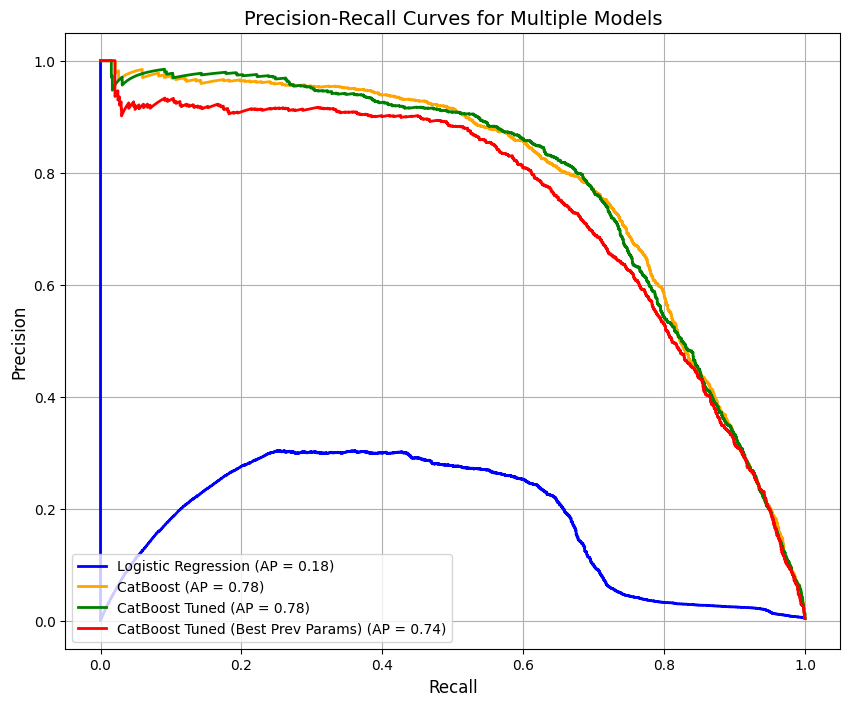

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_prob1 = logreg1.predict_proba(EDAX_test1scaled)[:, 1]
precision1, recall1, _ = precision_recall_curve(y_test, y_prob1)
average_precision1 = average_precision_score(y_test, y_prob1)

y_prob2 = catboost_model1.predict_proba(EDAX_test)[:, 1]
precision2, recall2, _ = precision_recall_curve(y_test, y_prob2)
average_precision2 = average_precision_score(y_test, y_prob2)

y_prob4 = best_model.predict_proba(EDAX_test)[:, 1]
precision4, recall4, _ = precision_recall_curve(y_test, y_prob4)
average_precision4 = average_precision_score(y_test, y_prob4)

y_prob5 = best_model2.predict_proba(EDAX_test)[:, 1]
precision5, recall5, _ = precision_recall_curve(y_test, y_prob5)
average_precision5 = average_precision_score(y_test, y_prob5)

plt.figure(figsize=(10, 8))
plt.plot(recall1, precision1, label=f'Logistic Regression (AP = {average_precision1:.2f})', color='blue', linewidth=2)
plt.plot(recall2, precision2, label=f'CatBoost (AP = {average_precision2:.2f})', color='orange', linewidth=2)
plt.plot(recall4, precision4, label=f'CatBoost Tuned (AP = {average_precision4:.2f})', color='green', linewidth=2)
plt.plot(recall5, precision5, label=f'CatBoost Tuned (Best Prev Params) (AP = {average_precision5:.2f})', color='red', linewidth=2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves for Multiple Models', fontsize=14)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)
plt.show()


In [ ]:
#import pandas as pd
#from sklearn.preprocessing import LabelEncoder
#LASSOX_train = X_train_resampled.copy()
#LASSOX_test = X_test.copy()
#categorical_columns = ["merchant","category","gender","city","state","job","d","ym","hour"]


In [ ]:
#encoders = {}
#for col in categorical_columns:
    #encoders[col] = LabelEncoder()
    # Fit on the combined unique values from both train and test
    #all_values = pd.concat([LASSOX_train[col], LASSOX_test[col]], ignore_index=True).unique()
    #encoders[col].fit(all_values)
    # Transform train and test data
    #LASSOX_train[col] = encoders[col].transform(LASSOX_train[col])
    #LASSOX_test[col] = encoders[col].transform(LASSOX_test[col])

In [ ]:
#LASSOX_test.dtypes

In [ ]:
#LASSOX_test["ym"]= [s[5:] for s in LASSOX_test["ym"]]
#LASSOX_train["ym"]= [s[5:] for s in LASSOX_train["ym"]]
#LASSOX_train= pd.get_dummies(LASSOX_train, columns=categorical_columns, drop_first=False)
#LASSOX_test= pd.get_dummies(LASSOX_test, columns=categorical_columns, drop_first=False)

In [ ]:
#missing_in_test = set(LASSOX_train.columns) - set(LASSOX_test.columns)
#print(missing_in_test)

In [ ]:
#missing_in_train = set(LASSOX_test.columns) - set(LASSOX_train.columns)
#print(missing_in_train)

In [ ]:
#for col in missing_in_test:
  #  LASSOX_test[col] = 0
#for col in missing_in_train:
 #   LASSOX_train[col] = 0
#LASSOX_test = LASSOX_test[LASSOX_train.columns]
#assssdsffasddsdsafs

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#LASSOX_train_scaled= scaler.fit_transform(LASSOX_train)
#LASSOX_test_scaled = scaler.transform(LASSOX_test)

In [ ]:
#from sklearn.linear_model import LogisticRegression

#ridge_log_reg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', random_state=42)
#ridge_log_reg.fit(LASSOX_train_scaled, y_train_resampled)
#y_pred_ridge = ridge_log_reg.predict(LASSOX_test_scaled)

In [ ]:
#from sklearn.linear_model import LogisticRegression

#lasso_log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42)
#lasso_log_reg.fit(LASSOX_train_scaled, y_train_resampled)
#y_pred_lasso = lasso_log_reg.predict(LASSOX_test_scaled)

In [ ]:
#cm_ridge = confusion_matrix(y_test, y_pred_ridge)
#cm_lasso = confusion_matrix(y_test, y_pred_lasso)

#fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#sns.heatmap(cm_ridge, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1], ax=axes[0])
#axes[0].set_title('Ridge Logistic Regression')
#axes[0].set_xlabel('Predicted')
#axes[0].set_ylabel('Actual')

#sns.heatmap(cm_lasso, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1], ax=axes[1])
#axes[1].set_title('Lasso Logistic Regression')
#axes[1].set_xlabel('Predicted')
#axes[1].set_ylabel('Actual')

#plt.tight_layout()
#plt.show()

In [ ]:
# Creare un DataFrame per i coefficienti
#ridge_coefficients = pd.DataFrame({
 #   'Feature': LASSOX_train.columns,
  #  'Ridge Coefficient': ridge_log_reg.coef_[0]
#})

#lasso_coefficients = pd.DataFrame({
 #   'Feature': LASSOX_train.columns,
  #  'Lasso Coefficient': lasso_log_reg.coef_[0]
#})

# Unire i risultati
#coefficients_df = pd.merge(ridge_coefficients, lasso_coefficients, on="Feature")

# Ordinare per importanza
#coefficients_df = coefficients_df.sort_values(by='Ridge Coefficient', key=abs, ascending=False)

# Visualizzare i risultati
#print(coefficients_df)

# Plot dei coefficienti
#fig, ax = plt.subplots(figsize=(12, 8))
#coefficients_df.set_index('Feature').plot(kind='barh', ax=ax, width=0.8)
#plt.title('Coefficienti delle Variabili: Ridge vs Lasso')
#plt.xlabel('Peso')
#plt.ylabel('Variabile')
#plt.tight_layout()
#plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from catboost import CatBoostClassifier

# Parametri scelti
final_params = {
    "learning_rate": 0.15,
    "max_depth": 5,
    "n_estimators": 300,
    "l2_leaf_reg": 4,
    "rsm": 0.7,
    "cat_features": ['d', 'ym', 'hour', "category", "state", "gender"],
    "verbose": 0
}

# Lista per salvare i risultati
results = []

# Genera diversi campioni di training
for i in range(10):  # Esegui 10 iterazioni con campioni diversi
    # Crea un nuovo training e validation split
    rus = RandomUnderSampler(random_state= None)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    EDAX_train_res=X_train_resampled[["d","ym","hour","category","state","gender","age","amt"]]
    EDAX_test=X_test[["d","ym","hour","category","state","gender","age","amt"]]

    # Inizializza il modello senza random_seed
    model = CatBoostClassifier(**final_params)

    # Addestra il modello
    model.fit(EDAX_train_res, y_train_resampled)

    # Previsioni sul dataset di test
    y_pred = model.predict(EDAX_test)

    # Calcola le metriche
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    recall = report['weighted avg']['recall']

    # Salva i risultati per questa iterazione
    results.append({
        "Iteration": i + 1,
        "F1-Score": f1_score,
        "Recall": recall
    })

# Crea una tabella con i risultati
results_df = pd.DataFrame(results)

# Mostra la tabella
print(results_df)




   Iteration  F1-Score    Recall
0          1  0.996430  0.995901
1          2  0.996626  0.996160
2          3  0.996241  0.995636
3          4  0.995232  0.994105
4          5  0.996532  0.996063
5          6  0.995366  0.994301
6          7  0.995347  0.994276
7          8  0.996855  0.996496
8          9  0.996653  0.996194
9         10  0.995205  0.994040
